In [0]:
import urllib.request as ur
#Importing Data from webpage with no Images.
ur.urlretrieve("https://www.gutenberg.org/files/65121/65121-0.txt", "/tmp/gd_fp_data.txt");
dbutils.fs.mv("file:/tmp/gd_fp_data.txt","dbfs:/data/gd_fp_data.txt");

In [0]:
# Cleaning the data.
gdRDD=sc.textFile("dbfs:/data/gd_fp_data.txt",5);

# Spliting and Converting all the data into Lower Case.
gdWordsRDD=gdRDD.flatMap(lambda line:line.lower().strip().split(" "));

# To remove Stop words.
from pyspark.ml.feature import StopWordsRemover as swr
remove =swr();
stopWords = remove.getStopWords();
gdCleanData=gdWordsRDD.filter(lambda words: words not in stopWords);

# To remove punctutations.
import re
cleanData = gdCleanData.map(lambda words: re.sub(r'[^a-zA-Z]','',words));

# To Remove Space.
gdIKVPairsRDD = cleanData.filter(lambda x: x != "");

In [0]:
# Setting Map for the words with the number of repetitions.
gdIKVPairsRDDs= gdIKVPairsRDD.map(lambda word:(word,1));
gdresultsRDD=gdIKVPairsRDDs.reduceByKey(lambda acc,value:acc+value);
# Filtering Top 25 Words with highest repetitions.
gdResult = gdresultsRDD.map(lambda x: (x[1], x[0])).sortByKey(False).take(15);

In [0]:
# Printing the list of highest repeting words with its map value.
print(gdResult);

[(88, 'project'), (72, 'basket'), (66, 'trick'), (57, 'conjuror'), (56, 'gutenbergtm'), (49, 'seed'), (45, 'work'), (43, 'one'), (40, 'cloth'), (38, 'water'), (37, 'time'), (37, 'it'), (35, 'may'), (34, 'works'), (31, 'gutenberg')]

word count
0 88 project
1 72 basket
2 66 trick
3 57 conjuror
4 56 gutenbergtm
5 49 seed
6 45 work
7 43 one
8 40 cloth
9 38 water
10 37 time
11 37 it
12 35 may
13 34 works
14 31 gutenberg

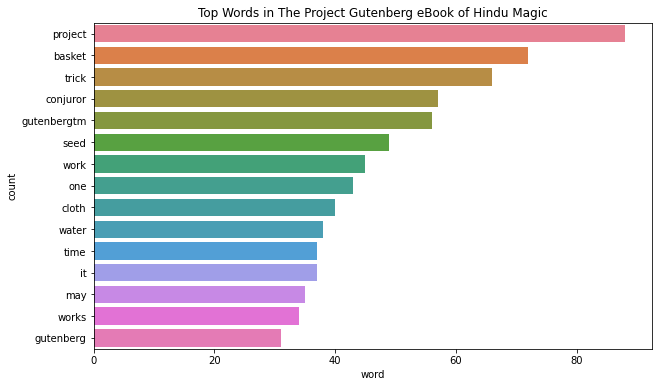

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# preparing chart information
source = 'The Project Gutenberg eBook of Hindu Magic'
title = 'Top Words in ' + source
xlabel = 'word'
ylabel = 'count'

# create Pandas dataframe from list of tuples
df = pd.DataFrame.from_records(gdResult, columns =[xlabel, ylabel]) ;
print(df);

# create plot (using matplotlib)
plt.figure(figsize=(10,6));
sns.barplot(xlabel, ylabel, data=df, palette="husl").set_title(title);
